In [71]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-71-12671cc18a50>:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


#Generate New Data

In [174]:
numperclust=100
blur=1

A=[1,1]
B=[5,1]

a=[A[0]+np.random.randn(numperclust)*blur,A[1]+np.random.randn(numperclust)*blur]
b=[B[0]+np.random.randn(numperclust)*blur,A[1]+np.random.randn(numperclust)*blur]

#Stack the data into horizontal and vertical axis and tranform the data to torch.tensor function

In [ ]:
data_np=np.hstack((a,b)).T
label_np=np.vstack((np.zeros((numperclust,1)),np.ones((numperclust,1))))

data=torch.tensor(data_np).float()
label=torch.tensor(label_np).float()

#Plot the generated cluster

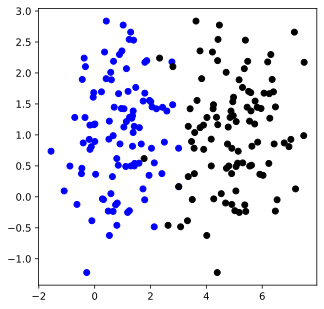

In [157]:
plt.figure(figsize=(5,5))
plt.plot(data[np.where(label==0)[0],0],data[np.where(label==1)[0],1],'bo')
plt.plot(data[np.where(label==1)[0],0],data[np.where(label==1)[0],1],'ko')

#Creat the Binary ANN Model

In [158]:
annclass=nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid()
)

annclass

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

#Calculate Loss Functions and optimize it by using Stochastic Gradiant Descent

In [159]:
lr=.01

lossfunc=nn.BCELoss()

optimizer=torch.optim.SGD(annclass.parameters(),lr=lr)


In [160]:
numepochs=1000

losses=torch.zeros(numepochs)

for epochi in range(numepochs):

  yhat=annclass(data)

  loss=lossfunc(yhat,label)
  losses[epochi]=loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


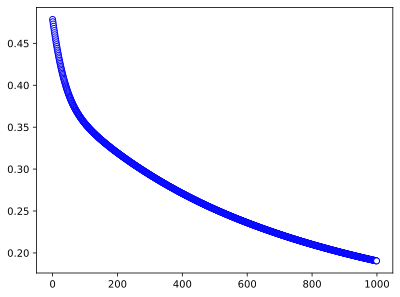

In [162]:
plt.plot(losses.detach(),'bo',markerfacecolor='w',linewidth=.1)

#Calculate the accuracy

In [163]:
pred=annclass(data)

predlabel=(pred>.5)

misclassification=np.where(predlabel!=label)[0]

totalacc=100*torch.mean((predlabel==label).float())

totalacc

tensor(96.5000)

#Plot the cluster and find the missclassified

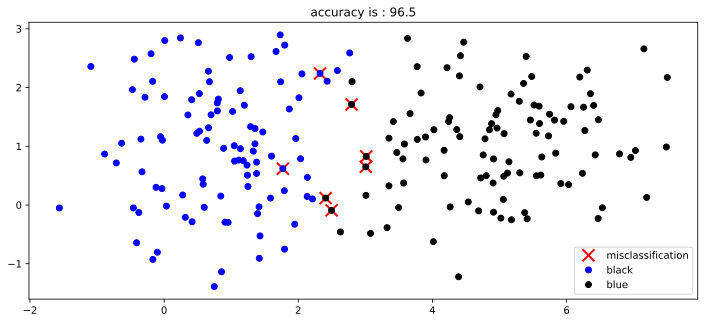

In [173]:
fig=plt.figure(figsize=(12,5))
plt.plot(data[misclassification,0],data[misclassification,1],'rx',markersize=12,markeredgewidth=2)
plt.plot(data[np.where(~predlabel)[0],0],data[np.where(~predlabel)[0],1],'bo')
plt.plot(data[np.where(predlabel)[0],0],data[np.where(predlabel)[0],1],'ko')
plt.title('accuracy is : %g'%totalacc)
plt.legend(['misclassification','black','blue'],loc='lower right')
plt.show()